# Image Effect - Square scatter diagram
---
- Author: Diego Inácio
- GitHub: [github.com/diegoinacio](https://github.com/diegoinacio)
- Notebook: [imgFX_scatterSquares.ipynb](https://github.com/diegoinacio/creative-coding-notebooks/blob/master/Generative/imgFX_scatterSquares.ipynb)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random, math, time
from PIL import Image as image

from _utils import *

In [2]:
def average(vec3):
    '''
    Returns the mean value between axes
    '''
    avr = int((vec3[0] + vec3[1] + vec3[2])/3.0)
    return avr

def midHigh(img):
    '''
    Returns the median and the maximum value of the input image
    '''
    mid = [0.0, 0.0, 0.0]
    high = [0.0, 0.0, 0.0]
    for y in range(imy):
        for x in range(imx):
            pix = img.getpixel((x, y))
            mid[0] += pix[0]
            mid[1] += pix[1]
            mid[2] += pix[2]
            if average(pix) > average(high): high = pix
            else: continue
    mid[0] = int(mid[0]/(imx*imy))
    mid[1] = int(mid[1]/(imx*imy))
    mid[2] = int(mid[2]/(imx*imy))
    return (tuple(mid), tuple(high))

def setRange(value, smin, smax, dmin, dmax):
    '''
    Linear interpolation
    '''
    value = float(value)
    smin, smax = float(smin), float(smax)
    dmin, dmax = float(dmin), float(dmax)
    out = dmin + ((value - smin)/(smax - smin))*(dmax - dmin)
    return int(out)

class Point:
    def __init__(self, tx, ty, cd, lvl):
        self.tx = tx
        self.ty = ty
        self.cd = tuple(cd)
        rad = setRange(lvl, lod - 1, 0, minSize, maxSize)
        self.rad = int(random.uniform(rad - rad*varSize, rad + rad*varSize))
    
    def square(self):
        '''
        Draw a square
        '''
        for y in range(self.ty - self.rad, self.ty + self.rad):
            for x in range(self.tx - self.rad, self.tx + self.rad):
                try:
                    imgOut.putpixel((x, y), self.cd)
                except:
                    continue

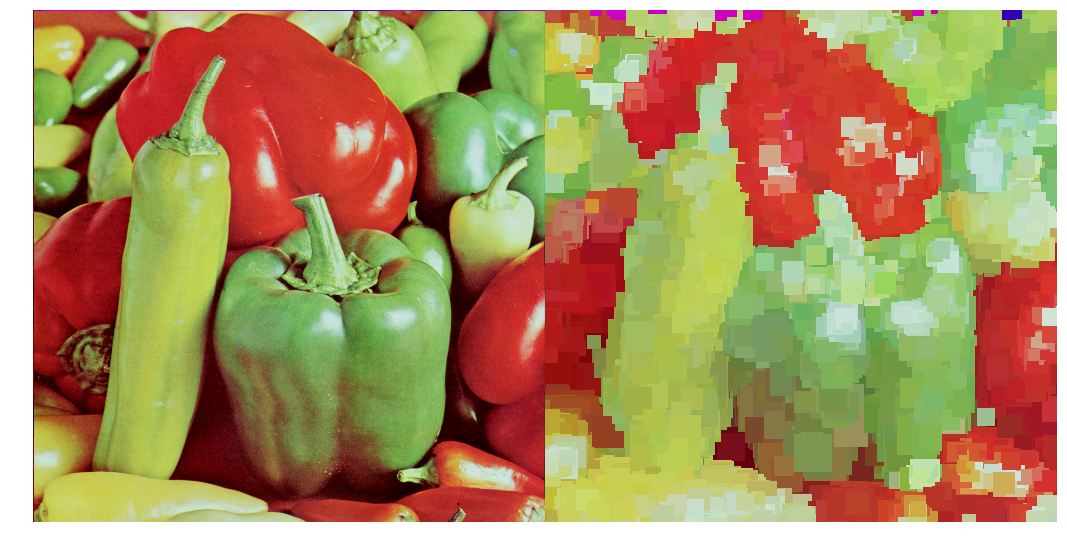

Wall time: 1min 6s


In [3]:
%%time
# parameters
lod = 8         # level of detail
minSamp = 0.001 # minimum probability
maxSamp = 0.05  # maximum probability

minSize = 8     # minimum size
maxSize = 32    # maximum size
varSize = 0.5   # size deviation

# inicialização
img = image.open('../_data/pimentos.png')
imx = img.size[0]
imy = img.size[1]
imgIn = image.new('RGB', img.size)
imgIn.paste(img)
midPix, highPix = midHigh(imgIn)
highPixMax = max(highPix)
imgOut = image.new('RGB', img.size, midPix)

# execução
imgArr = np.asarray(imgIn)
imgArrM = imgArr.max(axis=2)
lpt = []
for lvl in range(lod):
    mmin = int(lvl*highPixMax/lod)
    mmax = int((lvl + 1)*highPixMax/lod)
    sel = np.argwhere(np.logical_and(imgArrM > mmin,
                                     imgArrM <= mmax))
    sel = np.argwhere(imgArrM > mmin)
    np.random.shuffle(sel)
    lim = np.linspace(minSamp, maxSamp, lod)[lvl]
    lim = int(lim*len(sel))
    for py, px in sel[:lim]:
        cd = imgArr[py, px]
        lpt.append(Point(px, py, cd, lvl))
        
for point in lpt:
    point.square()

output = np.array([np.asarray(imgIn),
                   np.asarray(imgOut)])
panel(output, (2, 1))